In [1]:
import numpy
from pandas import read_csv
import pandas as pd
from numpy import arange
import operator
import pandas as pd
import numpy as np
import operator
import sys
from gensim.models import Word2Vec
from gensim.test.utils import common_texts, get_tmpfile
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib.patches as mpatches
import seaborn as sns
from gensim.models.keyedvectors import KeyedVectors
from pandas.plotting import scatter_matrix
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import plotly
import plotly.express as px
from pandas import set_option
from numpy import set_printoptions
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install wandb
import wandb
wandb.init(project="visualize-sklearn")

     |████████████████████████████████| 1.7 MB 5.1 MB/s 
     |████████████████████████████████| 181 kB 56.8 MB/s 
     |████████████████████████████████| 144 kB 56.0 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=7169af3f0920f1ae4aa4dab146effab83ece4aa462fe519bf85be880b079db82
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [4]:
binary_vectors = '/content/drive/MyDrive/stock2vec/stock2vec-master/embeddings/stoack2vec_Keyed_Binary.bin'
text_vectors = '/content/drive/MyDrive/stock2vec/stock2vec-master/embeddings/stoack2vec_Keyed_Text.vec'

model = KeyedVectors.load_word2vec_format(text_vectors, binary=False)
word_dict = {}
embeddings = []
symbols = []
for word in model.vocab:
    word_dict[word] = model[word]
    #embeddings.append(model2[word])

for key in word_dict:
    embeddings.append(word_dict[key])
#embeddings
len(word_dict)

505

In [5]:
weights = model.wv.vectors
weights

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


array([[ 0.24466084, -1.0446645 , -1.2685059 , -0.5117455 ],
       [-0.7107895 ,  0.9343236 , -0.07597128, -1.1681975 ],
       [ 0.06380544, -0.7932712 , -1.0630316 , -0.63787526],
       ...,
       [-0.624028  ,  0.71909416, -0.90465254, -0.03290709],
       [-0.05169835,  0.3635141 , -0.85713726, -0.3418677 ],
       [-0.2460704 ,  0.43191084, -0.8643705 , -0.34102848]],
      dtype=float32)

In [6]:
esg = read_csv('/content/drive/MyDrive/stock2vec/stock2vec-master/data/esg.csv', )
esg.columns

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings', 'ESG-2016', 'ESG-2017',
       'ESG-2018', 'ESG-2019', 'ESG-2020', 'Average ESG', 'Risk Level',
       'ESG Rating', 'Symbol.1', 'Name.1', 'Unnamed: 24'],
      dtype='object')

In [7]:
columns = ['Symbol', 'Name', 'Sector', 'Price', 'PricePerEarnings', 'DividendYield', 'EarningsPerShare', '52WeekLow', '52WeekHigh', 'MarketCap', 'ESGRating']
#columns = ['price', 'price_per_earnings', 'dividend_yield', 'earnings_per_share', '52_week_low', '52_week_high', 'market_cap', 'esg_rating']
#esg = esg[['Symbol', 'Name', 'Sector','Price', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'ESG Rating']]
esg = esg[['Symbol', 'Name', 'Sector','Price', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'ESG Rating']]
esg.columns = columns
#esg['vector1'] = 0.0
#esg['vector2'] = 0.0
#esg['vector3'] = 0.0
#esg['vector4'] = 0.0
esg.dropna(inplace=True)
target = esg.pop("ESGRating")
esg.shape

#target = esg.pop('esg_rating')

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(461, 10)

In [8]:
dataset = esg[['Price', 'PricePerEarnings', 'DividendYield', 'EarningsPerShare', '52WeekLow', 
               '52WeekHigh', 'MarketCap']]

In [9]:
# Split-out validation dataset
array = dataset.values
#X = array[:,0:11]
X = array
Y = target
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

                            OLS Regression Results                            
Dep. Variable:              ESGRating   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.317
Date:                Wed, 02 Mar 2022   Prob (F-statistic):              0.240
Time:                        21:56:48   Log-Likelihood:                -1833.9
No. Observations:                 461   AIC:                             3684.
Df Residuals:                     453   BIC:                             3717.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1842      1.387     17.435      0.0

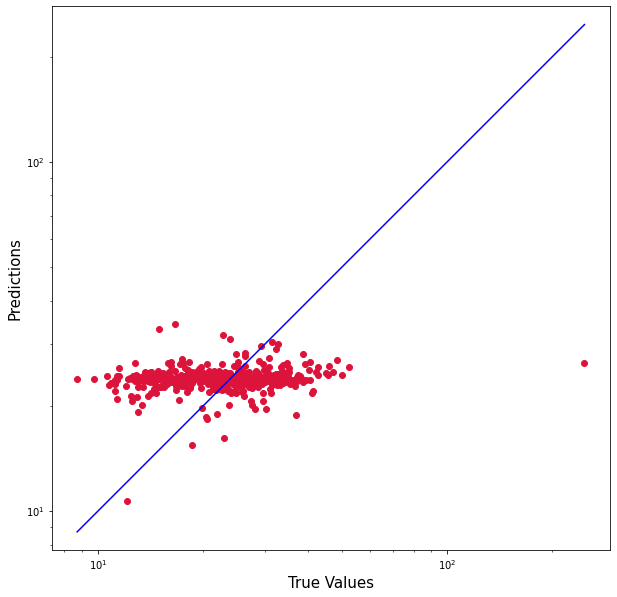

In [10]:
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

plt.figure(figsize=(10,10))
plt.scatter(Y, results.fittedvalues, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(results.fittedvalues), max(Y))
p2 = min(min(results.fittedvalues), min(Y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
pip install rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10669 sha256=16d076fedb7cef93e2e27cc3ec5890546dee0d6a62b64bcaf5e260b982ec3611
  Stored in directory: /root/.cache/pip/wheels/ad/48/d9/21fc62fbeff405425b0d5dd8b0354576cdb62ac97f6b11d1ef
Successfully built rfpimp


In [ ]:
#!pip install rfpimp
model2 = LinearRegression()
model2.fit(dataset, target)

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(dataset, Y,
test_size=validation_size, random_state=seed)
import rfpimp
imp = rfpimp.importances(model2, X_validation, Y_validation)
imp

,Importance
Feature,
52WeekHigh,0.961859
52WeekLow,0.324228
Price,0.165769
EarningsPerShare,0.058405
PricePerEarnings,0.002731
DividendYield,0.002364
MarketCap,-0.023310


In [ ]:
import plotly.express as px
fig = px.bar(imp, title="Permutation Feature Importance",
            labels={"x": "Number of Components", "y": "Cumulative Explained Variance"})
fig.update_traces(showlegend=False, selector=dict(type='bar'))
fig.update_xaxes(title_font=dict(size=18, family='Courier', color='black'),showgrid=False)
fig.update_yaxes(title_font=dict(size=18, family='Courier', color='black'),showgrid=False)
fig.update_layout( title={'text':"Permutation Feature Importance",
                         'y':0.85,
                         'yanchor': 'top',
                         'x':0.5,
                         'xanchor': 'center'})
fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)',
                           'paper_bgcolor': 'rgba(0,0,0,0)'
                  })
fig.update_layout(
    xaxis_title="ESG Ratings Features",
    yaxis_title="Importance Score",
    legend_title="Legend Title",
    font=dict(
        family="Time New",
        size=16,
        color="black"
    )
)

fig.show()

ValueError: ignored

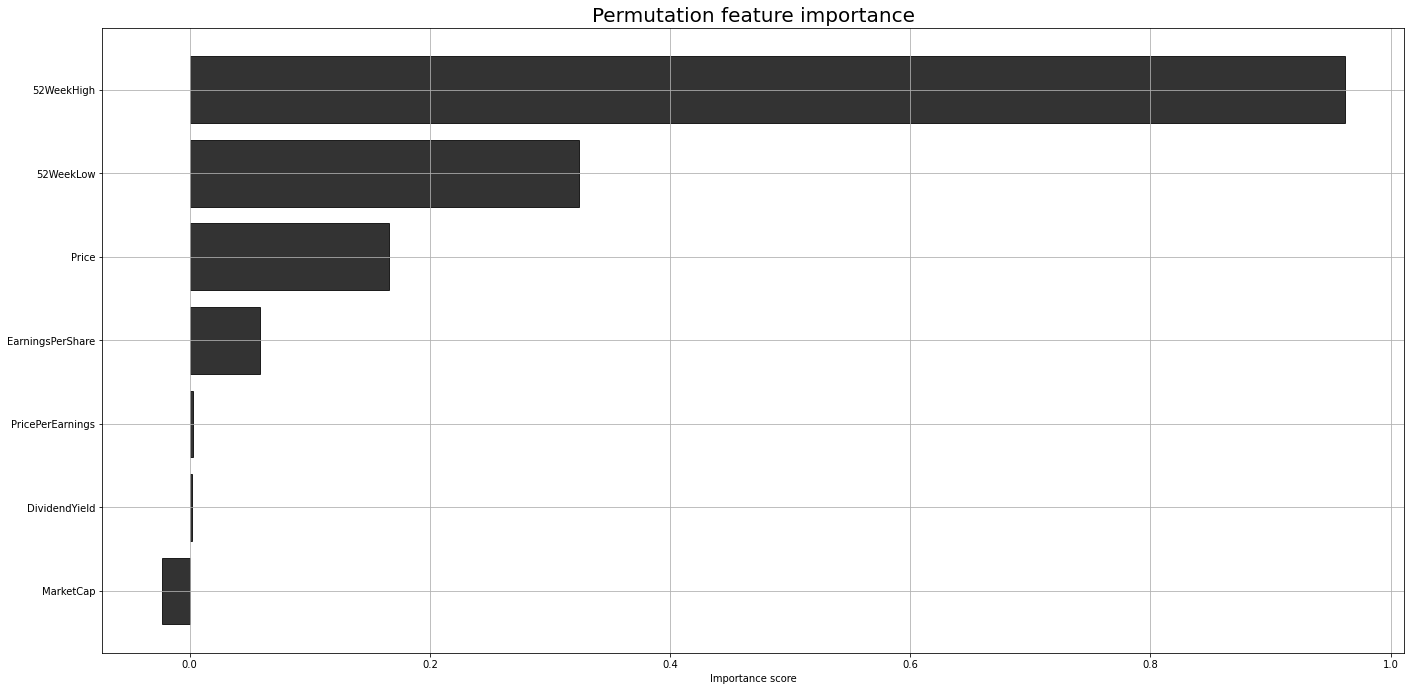

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='black', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
ax.text(0.8, 0.15, '', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='white', alpha=0.2)
plt.grid(b=None)
plt.gca().invert_yaxis()

fig.tight_layout()